In [1]:
import pandas as pd

In [3]:
df_agg_bookings = pd.read_csv("Datasets/fact_aggregated_bookings.csv")
df_agg_bookings.head(4)

,property_id,check_in_date,room_category,successful_bookings,capacity
0,16559,1-May-22,RT1,25,30.0
1,19562,1-May-22,RT1,28,30.0
2,19563,1-May-22,RT1,23,30.0
3,17558,1-May-22,RT1,30,19.0


In [12]:
#Find out the occupancy percentage
df_agg_bookings["occ_pct"] = df_agg_bookings["successful_bookings"]/df_agg_bookings["capacity"]
df_agg_bookings.head(4)

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct
0,16559,1-May-22,RT1,25,30.0,0.833333
1,19562,1-May-22,RT1,28,30.0,0.933333
2,19563,1-May-22,RT1,23,30.0,0.766667
3,17558,1-May-22,RT1,30,19.0,1.578947


In [25]:
df_agg_bookings['occ_pct'] = df_agg_bookings['occ_pct'].apply(lambda x: round(x*100, 2))
df_agg_bookings.head(3)

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct
0,16559,1-May-22,RT1,25,30.0,83.33
1,19562,1-May-22,RT1,28,30.0,93.33
2,19563,1-May-22,RT1,23,30.0,76.67


**There are various types of data transformations that you may have to perform based on the need. Few examples of data transformations are,

1-Creating new columns
2-Normalization
3-Merging data
4-Aggregation**

****Insights Generation****

In [27]:
df_agg_bookings.head(4)

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct
0,16559,1-May-22,RT1,25,30.0,83.33
1,19562,1-May-22,RT1,28,30.0,93.33
2,19563,1-May-22,RT1,23,30.0,76.67
3,17558,1-May-22,RT1,30,19.0,157.89


In [29]:
#What is the average occupancy rate in each of the room categories?
df_agg_bookings.groupby("room_category")["occ_pct"].mean().round(2)

room_category
RT1    58.22
RT2    58.04
RT3    58.03
RT4    59.30
Name: occ_pct, dtype: float64

In [33]:
#So here we have the room names based on room id
df_rooms = pd.read_csv("Datasets/dim_rooms.csv")
df_rooms

,room_id,room_class
0,RT1,Standard
1,RT2,Elite
2,RT3,Premium
3,RT4,Presidential


In [36]:
#So we don't got the exact picture that what is the room category so the get the clear picture we have to merge
df_merge = pd.merge(df_agg_bookings,df_rooms, left_on="room_category", right_on="room_id")
df_merge.head(4)
#Here we have to do left & right on beacuse we don't have a common column name

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct,room_id,room_class
0,16559,1-May-22,RT1,25,30.0,83.33,RT1,Standard
1,19562,1-May-22,RT1,28,30.0,93.33,RT1,Standard
2,19563,1-May-22,RT1,23,30.0,76.67,RT1,Standard
3,17558,1-May-22,RT1,30,19.0,157.89,RT1,Standard


In [37]:
#Merge the new data frame & perform the analysis
df_merge.groupby("room_class")["occ_pct"].mean().round(2)

room_class
Elite           58.04
Premium         58.03
Presidential    59.30
Standard        58.22
Name: occ_pct, dtype: float64

In [38]:
#Here room_category & room_id are same to so to get rid of duplication we can drop one of the columns
df_merge.drop("room_id", axis=1, inplace=True)
df_merge.head(4)

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct,room_class
0,16559,1-May-22,RT1,25,30.0,83.33,Standard
1,19562,1-May-22,RT1,28,30.0,93.33,Standard
2,19563,1-May-22,RT1,23,30.0,76.67,Standard
3,17558,1-May-22,RT1,30,19.0,157.89,Standard


In [40]:
#Print average occupancy rate per city
#So in df_merge data frame doesnot have city records so get into one data frame we have to again merge 

df_hotels = pd.read_csv("Datasets/dim_hotels.csv")
df_hotels.head(4)

,property_id,property_name,category,city
0,16558,Atliq Grands,Luxury,Delhi
1,16559,Atliq Exotica,Luxury,Mumbai
2,16560,Atliq City,Business,Delhi
3,16561,Atliq Blu,Luxury,Delhi


In [42]:
#Merge the two datasets
df_merge_2 = pd.merge(df_merge,df_hotels, on="property_id")
df_merge_2.head(4)

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct,room_class,property_name,category,city
0,16559,1-May-22,RT1,25,30.0,83.33,Standard,Atliq Exotica,Luxury,Mumbai
1,19562,1-May-22,RT1,28,30.0,93.33,Standard,Atliq Bay,Luxury,Bangalore
2,19563,1-May-22,RT1,23,30.0,76.67,Standard,Atliq Palace,Business,Bangalore
3,17558,1-May-22,RT1,30,19.0,157.89,Standard,Atliq Grands,Luxury,Mumbai


<Axes: xlabel='city'>

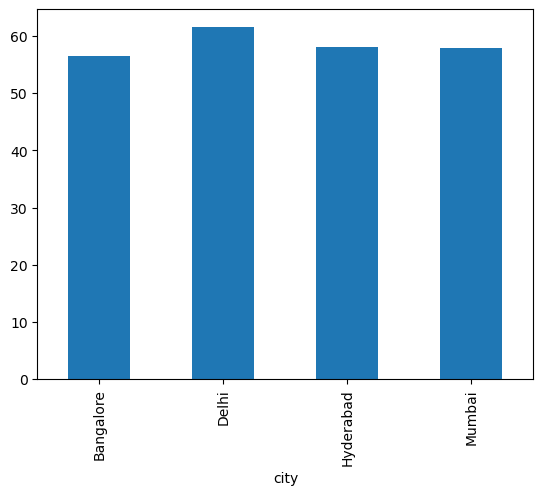

In [45]:
#Print average occupancy rate per city & plot in bar chart
df_merge_2.groupby("city")["occ_pct"].mean().round(2).plot(kind="bar")

In [47]:
#When was the occupancy was better on Weekday or Weekend?
#So in my datasets I don't the records of weekday or weekend so we have import it from date datasets
df_date = pd.read_csv("Datasets/dim_date.csv")
df_date.head(4)

,date,mmm yy,week no,day_type
0,01-May-22,May 22,W 19,weekend
1,02-May-22,May 22,W 19,weekeday
2,03-May-22,May 22,W 19,weekeday
3,04-May-22,May 22,W 19,weekeday


In [49]:
#Merge the two datasets
df_merge_3 = pd.merge(df_merge_2,df_date, left_on="check_in_date", right_on="date")
df_merge_3.head(4)

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct,room_class,property_name,category,city,date,mmm yy,week no,day_type
0,19563,10-May-22,RT3,15,29.0,51.72,Premium,Atliq Palace,Business,Bangalore,10-May-22,May 22,W 20,weekeday
1,18560,10-May-22,RT1,19,30.0,63.33,Standard,Atliq City,Business,Hyderabad,10-May-22,May 22,W 20,weekeday
2,19562,10-May-22,RT1,18,30.0,60.00,Standard,Atliq Bay,Luxury,Bangalore,10-May-22,May 22,W 20,weekeday
3,19563,10-May-22,RT1,16,30.0,53.33,Standard,Atliq Palace,Business,Bangalore,10-May-22,May 22,W 20,weekeday


In [52]:
#When was the occupancy was better on Weekday or Weekend?
df_merge_3.groupby("day_type")["occ_pct"].mean().round(2)

day_type
weekeday    50.90
weekend     72.39
Name: occ_pct, dtype: float64

In [54]:
#In month of june ,what is the occupancy for different cities
df_june_22 = df_merge_3[df_merge_3["mmm yy"]=="Jun 22"]

df_june_22.head(3)

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct,room_class,property_name,category,city,date,mmm yy,week no,day_type
2200,16559,10-Jun-22,RT1,20,30.0,66.67,Standard,Atliq Exotica,Luxury,Mumbai,10-Jun-22,Jun 22,W 24,weekeday
2201,19562,10-Jun-22,RT1,19,30.0,63.33,Standard,Atliq Bay,Luxury,Bangalore,10-Jun-22,Jun 22,W 24,weekeday
2202,19563,10-Jun-22,RT1,17,30.0,56.67,Standard,Atliq Palace,Business,Bangalore,10-Jun-22,Jun 22,W 24,weekeday


In [57]:
#Occupancy pct in month of june
df_june_22.groupby("city")["occ_pct"].mean().round(2).sort_values(ascending=False)

city
Delhi        62.47
Hyderabad    58.46
Mumbai       58.38
Bangalore    56.58
Name: occ_pct, dtype: float64

In [59]:
#So i got the new data of august
df_august = pd.read_csv("Datasets/new_data_august.csv")
df_august

,property_id,property_name,category,city,room_category,room_class,check_in_date,mmm yy,week no,day_type,successful_bookings,capacity,occ%
0,16559,Atliq Exotica,Luxury,Mumbai,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,30,30,100.00
1,19562,Atliq Bay,Luxury,Bangalore,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,21,30,70.00
2,19563,Atliq Palace,Business,Bangalore,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,23,30,76.67
3,19558,Atliq Grands,Luxury,Bangalore,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,30,40,75.00
4,19560,Atliq City,Business,Bangalore,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,20,26,76.92
5,17561,Atliq Blu,Luxury,Mumbai,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,18,26,69.23
6,17564,Atliq Seasons,Business,Mumbai,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,10,16,62.50


In [60]:
#Before cocncatinating make sure both the data frames have same no of columns
df_merge_3.columns

Index(['property_id', 'check_in_date', 'room_category', 'successful_bookings',
       'capacity', 'occ_pct', 'room_class', 'property_name', 'category',
       'city', 'date', 'mmm yy', 'week no', 'day_type'],
      dtype='object')

In [61]:
df_august.columns

Index(['property_id', 'property_name', 'category', 'city', 'room_category',
       'room_class', 'check_in_date', 'mmm yy', 'week no', 'day_type',
       'successful_bookings', 'capacity', 'occ%'],
      dtype='object')

In [62]:
#lets look into the shape
df_merge_3.shape

(6500, 14)

In [63]:
df_august.shape

(7, 13)

In [65]:
#Concat the two dataframes
df_concat = pd.concat([df_merge_3, df_august], ignore_index=True, axis=0)
df_concat.tail(10)

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct,room_class,property_name,category,city,date,mmm yy,week no,day_type,occ%
6497,17558,31-Jul-22,RT4,3,6.0,50.0,Presidential,Atliq Grands,Luxury,Mumbai,31-Jul-22,Jul 22,W 32,weekend,NaN
6498,19563,31-Jul-22,RT4,3,6.0,50.0,Presidential,Atliq Palace,Business,Bangalore,31-Jul-22,Jul 22,W 32,weekend,NaN
6499,17561,31-Jul-22,RT4,3,4.0,75.0,Presidential,Atliq Blu,Luxury,Mumbai,31-Jul-22,Jul 22,W 32,weekend,NaN
6500,16559,01-Aug-22,RT1,30,30.0,NaN,Standard,Atliq Exotica,Luxury,Mumbai,NaN,Aug-22,W 32,weekeday,100.00
6501,19562,01-Aug-22,RT1,21,30.0,NaN,Standard,Atliq Bay,Luxury,Bangalore,NaN,Aug-22,W 32,weekeday,70.00
6502,19563,01-Aug-22,RT1,23,30.0,NaN,Standard,Atliq Palace,Business,Bangalore,NaN,Aug-22,W 32,weekeday,76.67
6503,19558,01-Aug-22,RT1,30,40.0,NaN,Standard,Atliq Grands,Luxury,Bangalore,NaN,Aug-22,W 32,weekeday,75.00
6504,19560,01-Aug-22,RT1,20,26.0,NaN,Standard,Atliq City,Business,Bangalore,NaN,Aug-22,W 32,weekeday,76.92
6505,17561,01-Aug-22,RT1,18,26.0,NaN,Standard,Atliq Blu,Luxury,Mumbai,NaN,Aug-22,W 32,weekeday,69.23
6506,17564,01-Aug-22,RT1,10,16.0,NaN,Standard,Atliq Seasons,Business,Mumbai,NaN,Aug-22,W 32,weekeday,62.50


In [67]:
#Print revenue realized per city
df_bookings = pd.read_csv("Datasets/fact_bookings.csv")
df_bookings.head(4)

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
0,May012216558RT11,16558,27-04-22,1/5/2022,2/5/2022,-3.0,RT1,direct online,1.0,Checked Out,10010,10010
1,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
2,May012216558RT13,16558,28-04-22,1/5/2022,4/5/2022,2.0,RT1,logtrip,5.0,Checked Out,9100000,9100
3,May012216558RT14,16558,28-04-22,1/5/2022,2/5/2022,-2.0,RT1,others,NaN,Cancelled,9100,3640


In [68]:
df_hotels.head(4)

,property_id,property_name,category,city
0,16558,Atliq Grands,Luxury,Delhi
1,16559,Atliq Exotica,Luxury,Mumbai
2,16560,Atliq City,Business,Delhi
3,16561,Atliq Blu,Luxury,Delhi


In [70]:
#Join the two datagrames to get city & revenue in one data frames
df_merge_4 = pd.merge(df_bookings, df_hotels, on="property_id")
df_merge_4.head(4)

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,property_name,category,city
0,May012216558RT11,16558,27-04-22,1/5/2022,2/5/2022,-3.0,RT1,direct online,1.0,Checked Out,10010,10010,Atliq Grands,Luxury,Delhi
1,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi
2,May012216558RT13,16558,28-04-22,1/5/2022,4/5/2022,2.0,RT1,logtrip,5.0,Checked Out,9100000,9100,Atliq Grands,Luxury,Delhi
3,May012216558RT14,16558,28-04-22,1/5/2022,2/5/2022,-2.0,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi


In [72]:
#Print revenue realized per city
df_merge_4.groupby("city")["revenue_realized"].sum().sort_values()

city
Delhi        294500318
Hyderabad    325232870
Bangalore    420397050
Mumbai       668640991
Name: revenue_realized, dtype: int64

In [74]:
#Print month by month revenue
df_date.head(3)

,date,mmm yy,week no,day_type
0,01-May-22,May 22,W 19,weekend
1,02-May-22,May 22,W 19,weekeday
2,03-May-22,May 22,W 19,weekeday


In [76]:
#Join the two dataframes 
df_merge_5 = pd.merge(df_merge_4,df_date, left_on="check_in_date", right_on="date")
df_merge_5

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,property_name,category,city,date,mmm yy,week no,day_type


In [77]:
#I am getting blank lets check the data type of bothe dataframe
df_merge_4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134590 entries, 0 to 134589
Data columns (total 15 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   booking_id         134590 non-null  object 
 1   property_id        134590 non-null  int64  
 2   booking_date       134590 non-null  object 
 3   check_in_date      134590 non-null  object 
 4   checkout_date      134590 non-null  object 
 5   no_guests          134587 non-null  float64
 6   room_category      134590 non-null  object 
 7   booking_platform   134590 non-null  object 
 8   ratings_given      56683 non-null   float64
 9   booking_status     134590 non-null  object 
 10  revenue_generated  134590 non-null  int64  
 11  revenue_realized   134590 non-null  int64  
 12  property_name      134590 non-null  object 
 13  category           134590 non-null  object 
 14  city               134590 non-null  object 
dtypes: float64(2), int64(3), object(10)
memory usage: 1

In [78]:
df_date.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      92 non-null     object
 1   mmm yy    92 non-null     object
 2   week no   92 non-null     object
 3   day_type  92 non-null     object
dtypes: object(4)
memory usage: 3.0+ KB


In [81]:
#convert it to datetime type
df_date["date"] = pd.to_datetime(df_date["date"])
df_date.head(3)

,date,mmm yy,week no,day_type
0,2022-05-01,May 22,W 19,weekend
1,2022-05-02,May 22,W 19,weekeday
2,2022-05-03,May 22,W 19,weekeday


In [82]:
df_date.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      92 non-null     datetime64[ns]
 1   mmm yy    92 non-null     object        
 2   week no   92 non-null     object        
 3   day_type  92 non-null     object        
dtypes: datetime64[ns](1), object(3)
memory usage: 3.0+ KB


In [85]:
df_merge_4.head(3)

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,property_name,category,city
0,May012216558RT11,16558,27-04-22,1/5/2022,2/5/2022,-3.0,RT1,direct online,1.0,Checked Out,10010,10010,Atliq Grands,Luxury,Delhi
1,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi
2,May012216558RT13,16558,28-04-22,1/5/2022,4/5/2022,2.0,RT1,logtrip,5.0,Checked Out,9100000,9100,Atliq Grands,Luxury,Delhi


In [90]:
df_merge_4["check_in_date"] = pd.to_datetime(df_merge_4["check_in_date"],dayfirst=True, errors="coerce")
df_merge_4.head(4)

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,property_name,category,city
0,May012216558RT11,16558,27-04-22,2022-05-01,2/5/2022,-3.0,RT1,direct online,1.0,Checked Out,10010,10010,Atliq Grands,Luxury,Delhi
1,May012216558RT12,16558,30-04-22,2022-05-01,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi
2,May012216558RT13,16558,28-04-22,2022-05-01,4/5/2022,2.0,RT1,logtrip,5.0,Checked Out,9100000,9100,Atliq Grands,Luxury,Delhi
3,May012216558RT14,16558,28-04-22,2022-05-01,2/5/2022,-2.0,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi


In [91]:
df_merge_4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134590 entries, 0 to 134589
Data columns (total 15 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   booking_id         134590 non-null  object        
 1   property_id        134590 non-null  int64         
 2   booking_date       134590 non-null  object        
 3   check_in_date      55804 non-null   datetime64[ns]
 4   checkout_date      134590 non-null  object        
 5   no_guests          134587 non-null  float64       
 6   room_category      134590 non-null  object        
 7   booking_platform   134590 non-null  object        
 8   ratings_given      56683 non-null   float64       
 9   booking_status     134590 non-null  object        
 10  revenue_generated  134590 non-null  int64         
 11  revenue_realized   134590 non-null  int64         
 12  property_name      134590 non-null  object        
 13  category           134590 non-null  object  

In [93]:
#Join the two dataframes 
df_merge_5 = pd.merge(df_merge_4,df_date, left_on="check_in_date", right_on="date")
df_merge_5.head(3)

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,property_name,category,city,date,mmm yy,week no,day_type
0,May012216558RT11,16558,27-04-22,2022-05-01,2/5/2022,-3.0,RT1,direct online,1.0,Checked Out,10010,10010,Atliq Grands,Luxury,Delhi,2022-05-01,May 22,W 19,weekend
1,May012216558RT12,16558,30-04-22,2022-05-01,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi,2022-05-01,May 22,W 19,weekend
2,May012216558RT13,16558,28-04-22,2022-05-01,4/5/2022,2.0,RT1,logtrip,5.0,Checked Out,9100000,9100,Atliq Grands,Luxury,Delhi,2022-05-01,May 22,W 19,weekend


In [97]:
#Print month by month revenue
df_merge_5.groupby("mmm yy")["revenue_realized"].sum().sort_values(ascending=False)

mmm yy
Jul 22    243180932
May 22    234516453
Jun 22    229644140
Name: revenue_realized, dtype: int64

In [102]:
#Print revenue realized per hotel type
df_merge_5.groupby("property_name")["revenue_realized"].sum().sort_values(ascending=False)

property_name
Atliq Exotica    133673106
Atliq Palace     125553143
Atliq City       118290783
Atliq Blu        108111729
Atliq Bay        107557972
Atliq Grands      87316569
Atliq Seasons     26838223
Name: revenue_realized, dtype: int64

In [105]:
#Print average rating per city
df_merge_5.groupby("city")["ratings_given"].mean().round(2)

city
Bangalore    3.41
Delhi        3.79
Hyderabad    3.65
Mumbai       3.66
Name: ratings_given, dtype: float64

<Axes: ylabel='revenue_realized'>

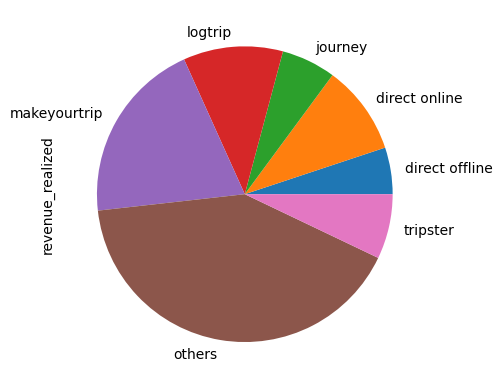

In [106]:
#Print a pie chart of revenue realized per booking platform
df_merge_5.groupby("booking_platform")["revenue_realized"].sum().plot(kind="pie")